In [1]:
%pip install stop-words
%pip install python-calamine

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=4abb5081124e64017352b39b2d7c303d1031792d6a20ae826cca974616f29eed
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import random
import re
import string
from pymystem3 import Mystem
from stop_words import get_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from itertools import combinations
import numpy as np
from sklearn import decomposition
import gensim
import matplotlib.pyplot as plt
import string

In [4]:
df = pd.read_excel("/content/Вознесенский для ЦВ (1).xlsx", sheet_name="Sheet1")
df.head()

,Название,Год,Текст
0,п е р в ы й СНЕГ,1948.0,"Над Академией, \nосатанев, \nгрехопадением \nп..."
1,ОСЕННИЙ ВОСКРЕСНИК,1953.0,"Кружатся опилки, \nгруши И ЛИМОНЫ. \nПрямо\nна..."
2,* * *,1953.0,Меня пугают формализмом.\nКак вы от жизни дале...
3,КОЛЕСО СМЕХА,1953.0,"Как мне нужна в поэзии \nсвятая простота, \nно..."
4,ГОРНЫЙ РОДНИЧОК,1955.0,Стучат каблучонки \nкак будто копытца \nдевчон...


In [5]:
df = df[["Название", "Текст"]]
'''df_test = df[0:100]
df_test'''
df

,Название,Текст
0,п е р в ы й СНЕГ,"Над Академией, \nосатанев, \nгрехопадением \nп..."
1,ОСЕННИЙ ВОСКРЕСНИК,"Кружатся опилки, \nгруши И ЛИМОНЫ. \nПрямо\nна..."
2,* * *,Меня пугают формализмом.\nКак вы от жизни дале...
3,КОЛЕСО СМЕХА,"Как мне нужна в поэзии \nсвятая простота, \nно..."
4,ГОРНЫЙ РОДНИЧОК,Стучат каблучонки \nкак будто копытца \nдевчон...
...,...,...
1335,*,"Сидишь беременная, бледная. \nКак ты переменил..."
1336,Туманная улица,ТУМАННАЯ УЛИЦА\nТуманный пригород как турман. ...
1337,***,* * *\nКто мы — фишки или великие? \nГениал...
1338,*,"Когда я когда-нибудь сдохну, \nне мучай травы ..."


In [6]:
def clear_text(ind):
    # Очщаю текст от переносов строк, пунктуации, цифр и др. лишних символов + перевожу в нижний регистр
    text = df.loc[ind, "Текст"]
    text = re.sub("\\n", " ", text)
    text = re.sub("\d", "", text)
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    df.loc[ind, "Текст"] = text


for ind in list(df.index):
    clear_text(ind)

df

,Название,Текст
0,п е р в ы й СНЕГ,над академией осатанев грехопадением пада...
1,ОСЕННИЙ ВОСКРЕСНИК,кружатся опилки груши и лимоны прямо на за...
2,* * *,меня пугают формализмом как вы от жизни далек...
3,КОЛЕСО СМЕХА,как мне нужна в поэзии святая простота но м...
4,ГОРНЫЙ РОДНИЧОК,стучат каблучонки как будто копытца девчонка...
...,...,...
1335,*,сидишь беременная бледная как ты переменила...
1336,Туманная улица,туманная улица туманный пригород как турман т...
1337,***,кто мы — фишки или великие гениальн...
1338,*,когда я когда нибудь сдохну не мучай травы и...


In [7]:
def get_lemmas(ind):
    # Лемматизация текста с помощью Mystem
    text = df.loc[ind, "Текст"]
    stem = Mystem()
    lemmas = stem.lemmatize(text)
    df.loc[ind, "Текст"] = " ".join(lemmas)


for ind in list(df.index):
    get_lemmas(ind)

df

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


,Название,Текст
0,п е р в ы й СНЕГ,над академия осатанеть грехопадение ...
1,ОСЕННИЙ ВОСКРЕСНИК,кружиться опилки груша и лимон п...
2,* * *,я пугать формализм как вы от жизн...
3,КОЛЕСО СМЕХА,как я нужный в поэзия святой прос...
4,ГОРНЫЙ РОДНИЧОК,стучать каблучонка как будто копытце ...
...,...,...
1335,*,сидеть беременный бледный как ты ...
1336,Туманная улица,туманный улица туманный пригород как ...
1337,***,кто мы — фишка или великий ...
1338,*,когда я когда нибудь сдыхать не ...


In [8]:
# Создаю матрицу doc x term
# Две следующие переменные понадобятся в дальнейшем
rus = get_stop_words('russian')
docs = df["Текст"]

vectorizer = TfidfVectorizer(stop_words=rus, ngram_range=(1, 1), max_df=.8, min_df=.01)
data_tv = vectorizer.fit_transform(docs)
data_dtm = pd.DataFrame(data_tv.toarray(), columns=vectorizer.get_feature_names_out())
data_dtm.index = df.index
# Следующая переменная тоже очень важна
feature_names = vectorizer.get_feature_names_out()
data_dtm

,ii,iii,iv,xx,автомат,автор,ад,аж,алый,америка,...,этаж,эхо,юбка,юный,яблоко,являться,язык,яйцо,яма,ящик
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




---



In [ ]:
# Выбор количества топиков - Оценка связности тем
kmin, kmax = 4, 40

In [ ]:
# Сохраняем модели для каждого кол-ва тем в выбранном промежутке
topic_models = []
for k in range(kmin,kmax+1):
    print("Применяю NMF с количесвтом топиков k=%d ..." % k)
    nmf = NMF(init="nndsvd", n_components=k, random_state=32)
    W = nmf.fit_transform(data_dtm)
    H = nmf.components_
    topic_models.append((k,W,H))

Применяю NMF с количесвтом топиков k=4 ...
Применяю NMF с количесвтом топиков k=5 ...
Применяю NMF с количесвтом топиков k=6 ...
Применяю NMF с количесвтом топиков k=7 ...
Применяю NMF с количесвтом топиков k=8 ...
Применяю NMF с количесвтом топиков k=9 ...
Применяю NMF с количесвтом топиков k=10 ...
Применяю NMF с количесвтом топиков k=11 ...
Применяю NMF с количесвтом топиков k=12 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=13 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=14 ...
Применяю NMF с количесвтом топиков k=15 ...
Применяю NMF с количесвтом топиков k=16 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=17 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=18 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=19 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=20 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=21 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=22 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=23 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=24 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=25 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=26 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=27 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=28 ...
Применяю NMF с количесвтом топиков k=29 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=30 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=31 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=32 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=33 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=34 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=35 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=36 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=37 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Применяю NMF с количесвтом топиков k=38 ...
Применяю NMF с количесвтом топиков k=39 ...
Применяю NMF с количесвтом топиков k=40 ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
# Чтобы выбрать кол-во тем, используем метод согласованности (coherence) - TC-W2V.
# Этот метод основан на использовании модели word2vec относительно нашего корпуса.
# Измерению подвергается показатель контекстуальной близости слов в корпусе для каждой пары ключевых слов топика.
# Здесь используется реализация Gensim для метода word2vec.
# Для начала, зададим класс, который будет генерировать документы в формате, необходимом для Gensim.
class TokenGenerator:
    def __init__(self, documents, stopwords):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__(self):
        print("Строим модель Word2Vec ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall(doc):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append(tok)
            yield tokens

In [ ]:
# Построим модель скипграмм word2vec для всех документов.
# (Т.е. каждое слово представлено как вектор, а измерения выражают ???? ).
docgen = TokenGenerator(docs, rus)
# Модель имеет 500 измерений, минимальная частота встречаемсоти слова в документе = 1.
w2v_model = gensim.models.Word2Vec(docgen, vector_size=500, min_count=1, sg=1)

Строим модель Word2Vec ...
Строим модель Word2Vec ...
Строим модель Word2Vec ...
Строим модель Word2Vec ...
Строим модель Word2Vec ...
Строим модель Word2Vec ...


In [ ]:
# Функция для определения показателя связности топиков.
def calculate_coherence(w2v_model, term_rankings):
    overall_coherence = 0.0
    # term_rankings - список списков ключевых слов топиков
    # topic_index - индекс топика
    for topic_index in range(len(term_rankings)):
        pair_scores = []
        # combinations - все неповторяющиеся парные комбинации ключ. слов
        for pair in combinations(term_rankings[topic_index], 2):
            # проверяем близость в корпусе каждой пары ключ. слов
            pair_scores.append(w2v_model.wv.similarity(pair[0], pair[1]))
        # вычисляем средний показатель близости для топика
        topic_score = sum(pair_scores) / len(pair_scores)
        # вычисляем суммарный показатель связности для топиков
        overall_coherence += topic_score
    # возвращаем средний показатель связности для топиков
    return overall_coherence / len(term_rankings)

In [ ]:
# Определим функцию для получения ключ. слов (n=top) по номеру топика (topic_index).
def get_descriptor(feature_names, H, topic_index, top):
    # получаем топ индексов ключ. слов
    top_indices = np.argsort(H[topic_index,:])[::-1]
    # получаем соответствующие фичи (сами ключ. слова)
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(feature_names[term_index])
    return top_terms

In [ ]:
# Получаем показатели кол-ва топиков и связности топиков для каждой модели
k_values = []
coherences = []
# Итерируемое - кол-во топиков в модели
for (k,W,H) in topic_models:
    # term_rankings - список списков ключ. слов (n=10) для каждого топика в модели
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append(get_descriptor(feature_names, H, topic_index, 10))
    k_values.append(k)
    # вычисляем среднюю связность каждой модели
    coherences.append(calculate_coherence(w2v_model, term_rankings))
    print("K=%02d: Coherence=%.4f" % (k, coherences[-1]))

K=04: Coherence=0.9873
K=05: Coherence=0.9851
K=06: Coherence=0.9817
K=07: Coherence=0.9824
K=08: Coherence=0.9825
K=09: Coherence=0.9828
K=10: Coherence=0.9826
K=11: Coherence=0.9839
K=12: Coherence=0.9840
K=13: Coherence=0.9839
K=14: Coherence=0.9837
K=15: Coherence=0.9840
K=16: Coherence=0.9851
K=17: Coherence=0.9843
K=18: Coherence=0.9838
K=19: Coherence=0.9832
K=20: Coherence=0.9842
K=21: Coherence=0.9843
K=22: Coherence=0.9840
K=23: Coherence=0.9855
K=24: Coherence=0.9853
K=25: Coherence=0.9847
K=26: Coherence=0.9851
K=27: Coherence=0.9846
K=28: Coherence=0.9846
K=29: Coherence=0.9846
K=30: Coherence=0.9847
K=31: Coherence=0.9844
K=32: Coherence=0.9853
K=33: Coherence=0.9845
K=34: Coherence=0.9845
K=35: Coherence=0.9839
K=36: Coherence=0.9850
K=37: Coherence=0.9835
K=38: Coherence=0.9847
K=39: Coherence=0.9847
K=40: Coherence=0.9843


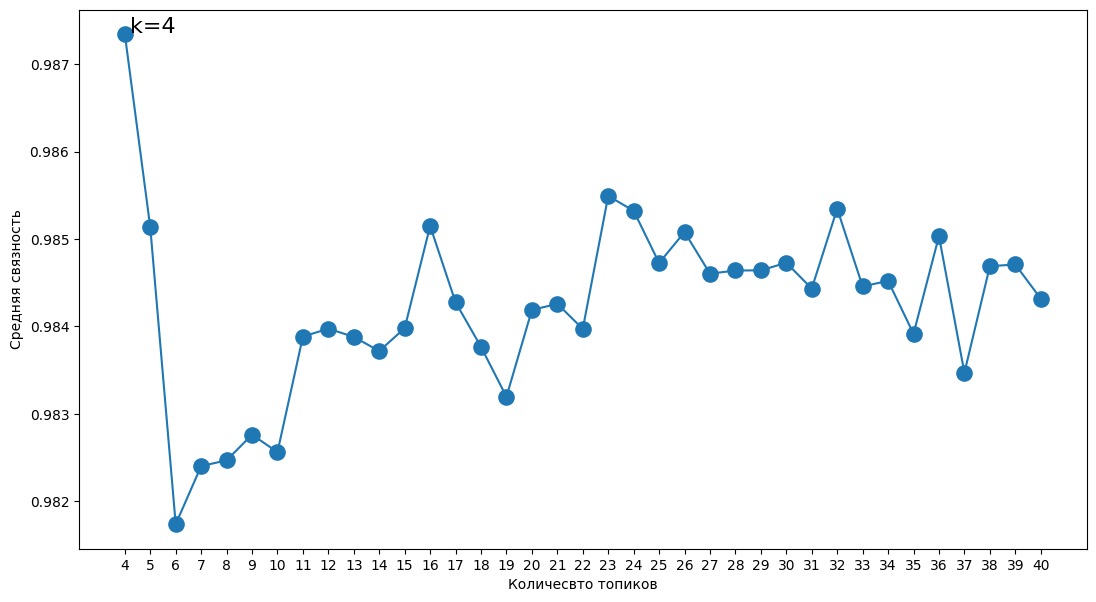

In [ ]:
# Строим график
fig = plt.figure(figsize=(13,7))
# линейный график
ax = plt.plot(k_values, coherences)
plt.xticks(k_values)
plt.xlabel("Количесвто топиков")
plt.ylabel("Средняя связность")
# добавляем точки
plt.scatter(k_values, coherences, s=120)
# находим и аннотируем наивысшую точку на графике
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
plt.show()

Не стал опираться на наивысший показатель, т.к. столь малое кол-во тем повредит интерпретируемости. Остановился на таком кол-ве тем, около которого наблюдается переход тренда от постепенного восхождения связности к его постепенному снижению - 25 тем. В целом, колебания связности не слишком значительны.



---



In [11]:
# Модель с выбранным количесвтом топиков
num_topics = 25
nmf = NMF(n_components=num_topics, random_state=33)
W = nmf.fit_transform(data_dtm)
H = nmf.components_
for n in nmf.components_:
  print(n.max())
W.shape

2.0926943289461524
0.825440714418104
1.6418821609674357
1.836738175538042
1.8500284160493818
2.600666362298711
2.003881001530458
1.9297241546580344
1.7578217023534448
1.6247274223128605
2.2596926124229566
1.545765457617736
1.388532640571367
1.678992166900761
1.8646459867168081
1.173645060251381
1.555691415614388
1.566170408972351
1.3025416343023513
1.1950087809793168
0.7982209848581668
1.0493143632540172
1.124265707377939
1.2360010453419494
1.3068691496025109


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(1340, 25)

In [12]:
# Функция для отображения тем
def display_topics(nmf, feature_names, num_top_words):
    for topic_idx, topic_words in enumerate(nmf.components_):
        top_words = []
        for i in topic_words.argsort()[:-num_top_words - 1:-1]:
            top_words.append(feature_names[i])
        print(f"Тема {topic_idx}: {', '.join(top_words)}")

#### Перечень тем
display_topics(nmf, feature_names, 10)

Тема 0: стена, дом, окно, труба, тень, чужой, жить, звук, плечо, сквозь
Тема 1: ст, ен, ет, го, ер, сь, ся, ск, зн, ва
Тема 2: белый, надевать, роза, темный, словно, выходить, бить, джинсы, свет, ходить
Тема 3: небо, синий, крест, написать, лес, ребенок, подымать, голубой, цвет, облако
Тема 4: море, берег, пляж, палец, чайка, волна, плыть, напоминать, выходить, начинать
Тема 5: музыка, бывать, скрипка, играть, окно, слово, скрывать, жить, звезда, сыграть
Тема 6: любить, говорить, москва, глядеть, спасать, ждать, счастливый, русски, голова, хороший
Тема 7: душа, хороший, господь, ангел, птица, глаз, народ, жить, лес, место
Тема 8: давать, господи, свет, дерьмо, боже, спасать, речь, господь, россия, называть
Тема 9: идти, новый, ребенок, мать, след, тянуть, встречать, дыхание, дверь, господь
Тема 10: снег, красный, прийти, метель, река, хороший, снежок, слепой, солнце, пахнуть
Тема 11: свой, пить, жить, ребенок, становиться, чужой, друг, отец, красивый, подруга
Тема 12: поэт, понимать, у

In [13]:
# Гистограмма - веса ключевых слов для топика.
def plot_top_term_weights(feature_names, H, topic_index, top):
    top_indices = np.argsort(H[topic_index,:])[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append(feature_names[term_index])
        top_weights.append(H[topic_index,term_index])
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Вес слова",fontsize=14)
    plt.tight_layout()
    plt.show()

In [1]:
#### Второе число с конца - Номер топика
plot_top_term_weights(feature_names, H, 1, 15)

NameError: name 'plot_top_term_weights' is not defined

In [15]:
# Рейтинг документов для топика.
titles = df["Название"]
def get_top_docs(titles, W, topic_index, top):
    top_indices = np.argsort(W[:,topic_index])[::-1]
    top_docs = []
    for doc_index in top_indices[0:top]:
        top_docs.append((doc_index, titles[doc_index]))
    return top_docs

In [65]:
#### Второе число с конца - Номер топика
topic_docs = get_top_docs(titles, W, 24, 10)
for i, title in topic_docs:
    print("%02d. %s" % ((i + 2), title))

900. *  *  *
1243. ТРЕТЬЯ РУКА
1109. * * *
653. РУКА 44-го ГОДА
228. ПРАВИЛА ПОВЕДЕНИЯ ЗА СТОЛОМ
857. ДРУГУ
270. * * *
503. ПОСЛЕ ПОСЛЕДНЕЙ ВОЙНЫ
979. 14 АПРЕЛЯ
403. ТВОРЧЕСТВО




---



In [9]:
# Занасение результатов в датасет.
def get_top_topics(W, doc_index, top):
    top_indices = np.argsort(W[doc_index,:])[::-1]
    top_topics = []
    for topic_index in top_indices[0:top]:
        topic_weight = W[doc_index,topic_index]
        top_topics.append((topic_index, topic_weight))
    string = str()
    for topic in top_topics:
        string += f"Тема {topic[0]} = {topic[1]}\n"
    return string

In [10]:
for doc_index in range(0, df.shape[0]):
    df.loc[doc_index, "Темы"] = get_top_topics(W, doc_index, 3)
df

NameError: name 'W' is not defined

In [ ]:
# Переименование тем.
TOPIC_INDICES = ["Тема 0", "Тема 1", "Тема 2", "Тема 3", "Тема 4", "Тема 5", "Тема 6", "Тема 7", "Тема 8", "Тема 9", "Тема 10", "Тема 11", "Тема 12", "Тема 13", "Тема 14", "Тема 15", "Тема 16", "Тема 17", "Тема 18", "Тема 19", "Тема 20", "Тема 21", "Тема 22", "Тема 23", "Тема 24"]
TOPIC_NAMES = ["Домашняя", "Failed", "Белое", "Небо", "Море", "Музыка", "Любовь", "Душа", "Молитва", "Идти?", "Снег", "Свой?","Фигура поэта", "Женщина", "Время", "Ушедшее/Уходящее", "Сердце/Чувство", "Черный?", "Страна?", "Сон", "Земля?", "Лететь?", "Прощать?", "Поле/Природа", "Рука?"]
IND_TO_NAMES = dict(
    zip(
        TOPIC_INDICES,
        TOPIC_NAMES,
        strict = True
    )
)


'''def compile_ti_regex():
    regex = "|".join(re.escape(ti) for ti in TOPIC_INDICES)
    return re.compile(regex)'''
TI_REGEX = re.compile(r"Тема\s\d+")

In [ ]:
time = 0
for topic_data in df["Темы"]:
    topic_inds = re.findall(TI_REGEX, topic_data)
    for ind in topic_inds:
        df.loc[time, "Темы"] = re.sub(ind, IND_TO_NAMES[ind], topic_data)
    time += 1
df

,Название,Год,Текст,Темы
0,п е р в ы й СНЕГ,1948.0,"Над Академией, \nосатанев, \nгрехопадением \nп...",Снег = 0.14424941565659222\nНебо = 0.055868536...
1,ОСЕННИЙ ВОСКРЕСНИК,1953.0,"Кружатся опилки, \nгруши И ЛИМОНЫ. \nПрямо\nна...",Лететь? = 0.12361999750435565\nПрощать? = 0.01...
2,* * *,1953.0,Меня пугают формализмом.\nКак вы от жизни дале...,Сердце/Чувство = 0.042563873193857855\nПрощать...
3,КОЛЕСО СМЕХА,1953.0,"Как мне нужна в поэзии \nсвятая простота, \nно...",Лететь? = 0.13577950266591415\nУшедшее/Уходяще...
4,ГОРНЫЙ РОДНИЧОК,1955.0,Стучат каблучонки \nкак будто копытца \nдевчон...,Земля? = 0.11480328850795109\nПрощать? = 0.025...
...,...,...,...,...
1335,*,NaN,"Сидишь беременная, бледная. \nКак ты переменил...",Свой? = 0.0553991754661745\nМолитва = 0.042784...
1336,Туманная улица,NaN,ТУМАННАЯ УЛИЦА\nТуманный пригород как турман. ...,Женщина = 0.04655082854337873\nВремя = 0.03716...
1337,***,NaN,* * *\nКто мы — фишки или великие? \nГениал...,Снег = 0.06954266455663624\nФигура поэта = 0.0...
1338,*,NaN,"Когда я когда-нибудь сдохну, \nне мучай травы ...",Женщина = 0.1273017429776706\nФигура поэта = 0...


In [ ]:
df.to_excel("/content/voz_TM.xlsx")